In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2
from subgrid_parameterization.preprocess import SAM_helpers as sam

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
path0 = "/glade/work/stepheba/les_and_clubb_benchmark_runs/stepheba_sam_runs/derecho/"

# path = 'sam-bomex/'
# file = 'BOMEX_64x64x75_100m_40m_1s'
# file = 'BOMEX_3d'

path = "sam-rf01/"
file = "DYCOMS_RF01_96x96x320"
# file = '*_3d'

# # RF01 won't work until stretched grid is implemented
# path = 'sam-rf02/'
# file = 'DYCOMS_RF02_128x128x96_dr_nosed'
# file = '*_3d'

In [ ]:
ds = xr.open_dataset(path0 + path + file + ".nc")

In [ ]:
ds

<xarray.Dataset> Size: 135MB
Dimensions:      (x: 1, y: 1, z: 320, time: 240)
Coordinates:
  * x            (x) float32 4B -122.0
  * y            (y) float32 4B 31.5
  * z            (z) float32 1kB 2.5 7.5 12.5 ... 1.588e+03 1.592e+03 1.598e+03
  * time         (time) datetime64[ns] 2kB 2001-07-10T06:01:00 ... 2001-07-10...
Data variables: (12/446)
    p            (z) float32 1kB ...
    PREC         (time) float32 960B ...
    CWP          (time) float32 960B ...
    IWP          (time) float32 960B ...
    RWP          (time) float32 960B ...
    SWP          (time) float32 960B ...
    ...           ...
    THLPRRP_IP   (time, z, y, x) float32 307kB ...
    RTPNRP_IP    (time, z, y, x) float32 307kB ...
    THLPNRP_IP   (time, z, y, x) float32 307kB ...
    RRPNRP_IP    (time, z, y, x) float32 307kB ...
    RRP3_IP      (time, z, y, x) float32 307kB ...
    NRP3_IP      (time, z, y, x) float32 307kB ...
Attributes:
    SAM version:  
    caseid:       96x96x320
    Conventions:  COARDS

In [ ]:
# nzm, nzt, ngrdcol, zm, zt, dzm, dzt, invrs_dzm, invrs_dzt
nzm, nzt, ngrdcol, zm, zt, dzm, dzt, invrs_dzm, invrs_dzt = sam.get_grid(ds)

In [ ]:
U2 = sam.stagger_var("U2", ds, zt)
V2 = sam.stagger_var("V2", ds, zt)
W2 = sam.stagger_var("W2", ds, zt)
# e = sam.get_TKE(ds)
# assert ( e == (0.5 * ( U2 + V2 + W2 ))).all()
TKE = 0.5 * (U2 + V2 + W2)

In [ ]:
itime = range(120, ngrdcol)
kstart = 0
kend = nzm  # -21 #int(0.75*nzm)
z = zt[itime, kstart:kend].T
e = TKE[itime, kstart:kend].T
up2 = U2[itime, kstart:kend].T
vp2 = V2[itime, kstart:kend].T
wp2 = W2[itime, kstart:kend].T

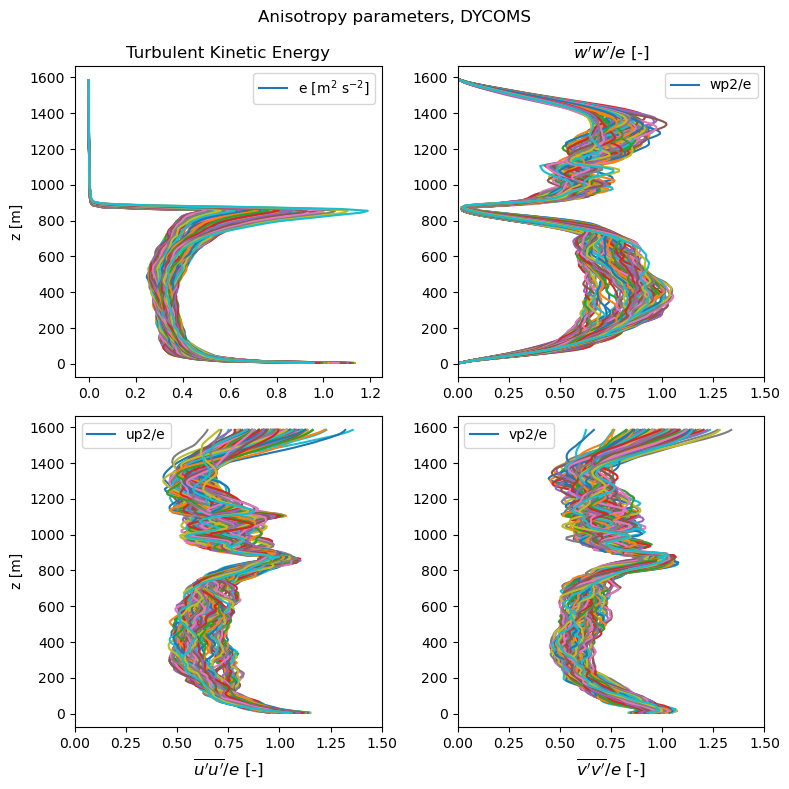

In [ ]:
fs = 12
try:
    del (fig, axs)
    print("deleted old figure")
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
except:
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

eplot = axs[0, 0].plot(e, z)
eplot[0].set_label(r"e [m$^2$ s$^{-2}$]")
axs[0, 0].set_title("Turbulent Kinetic Energy")

wplot = axs[0, 1].plot(wp2 / e, z)
wplot[0].set_label("wp2/e")
axs[0, 1].set_title(r"$\overline{w'w'}/e$ [-]")

uplot = axs[1, 0].plot(up2 / e, z)
uplot[0].set_label("up2/e")
axs[1, 0].set_xlabel(r"$\overline{u'u'}/e$ [-]", fontsize=fs)

vplot = axs[1, 1].plot(vp2 / e, z)
vplot[0].set_label("vp2/e")
axs[1, 1].set_xlabel(r"$\overline{v'v'}/e$ [-]", fontsize=fs)


for i in range(len(axs)):
    axs[i, 0].set_ylabel("z [m]")
    for j in range(len(axs[0])):
        axs[i, j].legend()
        if (i, j) != (0, 0):
            axs[i, j].set_xlim((0, 1.5))

fig.suptitle("Anisotropy parameters, DYCOMS")
fig.tight_layout()

deleted old figure


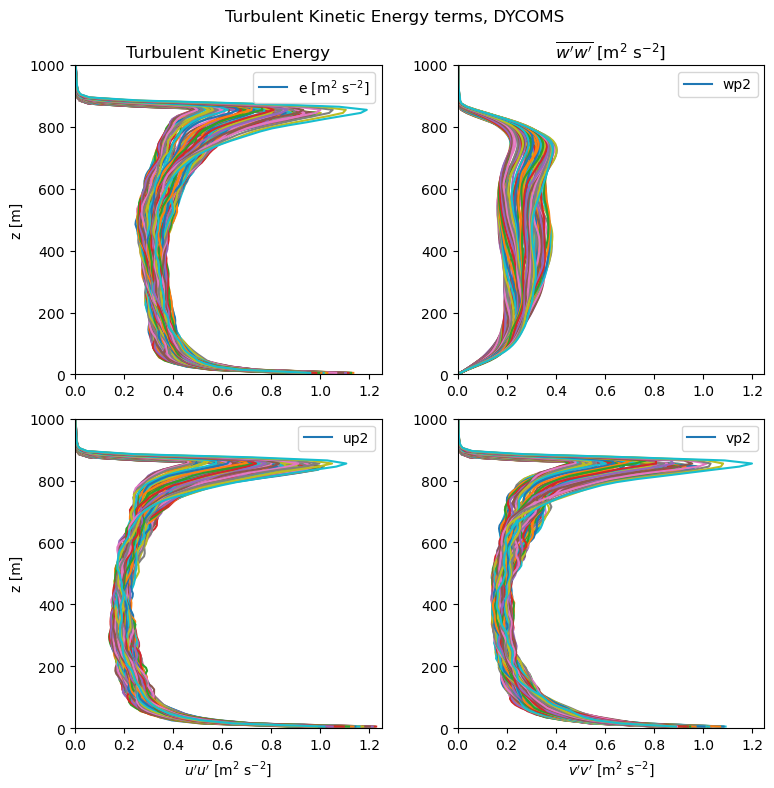

In [ ]:
try:
    del (fig, axs)
    print("deleted old figure")
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
except:
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

eplot = axs[0, 0].plot(e, z)
eplot[0].set_label(r"e [m$^2$ s$^{-2}$]")
axs[0, 0].set_title("Turbulent Kinetic Energy")

wplot = axs[0, 1].plot(wp2, z)
wplot[0].set_label("wp2")
axs[0, 1].set_title(r"$\overline{w'w'}$ [m$^2$ s$^{-2}$]")

uplot = axs[1, 0].plot(up2, z)
uplot[0].set_label("up2")
axs[1, 0].set_xlabel(r"$\overline{u'u'}$ [m$^2$ s$^{-2}$]")

vplot = axs[1, 1].plot(vp2, z)
vplot[0].set_label("vp2")
axs[1, 1].set_xlabel(r"$\overline{v'v'}$ [m$^2$ s$^{-2}$]")

for i in range(len(axs)):
    axs[i, 0].set_ylabel("z [m]")
    for j in range(len(axs[0])):
        axs[i, j].legend()
        axs[i, j].set_xlim((0, 1.25))
        axs[i, j].set_ylim((0, 1000))

fig.suptitle("Turbulent Kinetic Energy terms, DYCOMS")
fig.tight_layout()